In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [6]:
#pd.read_csv('file name') reads the data from pandas whereas "df" give the output data 
df = pd.read_excel('Telco_customer_churn.xlsx')



In [8]:
df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [13]:
import pandas as pd

# Step 1: Read Excel file
df = pd.read_excel('Telco_customer_churn.xlsx')

# Step 2: Replace blank strings (' ') with NaN, and convert to float
df['Total Charges'] = pd.to_numeric(df['Total Charges'].replace(' ', ''), errors='coerce')

# Step 3: Confirm it worked
print(df['Total Charges'].dtype)
df[['Monthly Charges', 'Total Charges']].head()


float64


,Monthly Charges,Total Charges
0,53.85,108.15
1,70.70,151.65
2,99.65,820.50
3,104.80,3046.05
4,103.70,5036.30


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [16]:

# We must handle cases where Monthly Charges = 0 to avoid division by zero
df['Months_Used'] = df.apply(
    lambda row: round(row['Total Charges'] / row['Monthly Charges'], 2)
    if row['Monthly Charges'] != 0 else 0,
    axis=1
)

# Step 4: Show first few rows with new column
df[['Monthly Charges', 'Total Charges', 'Months_Used']].head()

,Monthly Charges,Total Charges,Months_Used
0,53.85,108.15,2.01
1,70.70,151.65,2.14
2,99.65,820.50,8.23
3,104.80,3046.05,29.07
4,103.70,5036.30,48.57


In [17]:
# Add new column 'Months_Used' to calculate how many months worth of charges have been paid
df['Months_Used'] = df.apply(
    lambda row: round(row['Total Charges'] / row['Monthly Charges'], 2)
    if row['Monthly Charges'] != 0 else 0,
    axis=1
)

# Display the first few rows with the new column
df[['Monthly Charges', 'Total Charges', 'Months_Used']].head()

,Monthly Charges,Total Charges,Months_Used
0,53.85,108.15,2.01
1,70.70,151.65,2.14
2,99.65,820.50,8.23
3,104.80,3046.05,29.07
4,103.70,5036.30,48.57


In [18]:
df.head(5)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Months_Used
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,2.01
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,2.14
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved,8.23
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,29.07
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,48.57


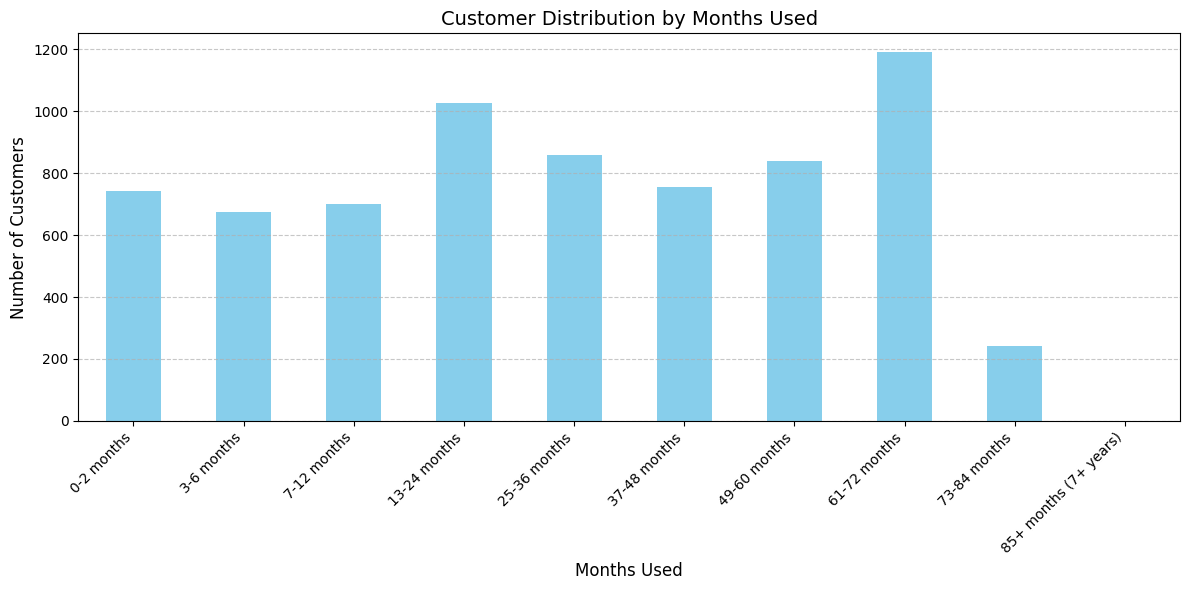

In [20]:


# --- Step 1: Calculate 'Months_Used' ---
# (Assuming 'df' is your DataFrame with 'Monthly Charges' and 'Total Charges')
#---df['Months_Used'] = df.apply(
#     lambda row: round(row['Total Charges'] / row['Monthly Charges'], 2) 
#     if row['Monthly Charges'] != 0 else 0,
#     axis=1
# )

# --- Step 2: Categorize into bins (0-2 months, ..., 7+ years) ---
bins = [0, 2, 6, 12, 24, 36, 48, 60, 72, 84, float('inf')]
labels = [
    '0-2 months', '3-6 months', '7-12 months', '13-24 months', 
    '25-36 months', '37-48 months', '49-60 months', 
    '61-72 months', '73-84 months', '85+ months (7+ years)'
]

df['Months_Used_Category'] = pd.cut(
    df['Months_Used'], 
    bins=bins, 
    labels=labels, 
    right=False
)

# --- Step 3: Count customers per category ---
usage_distribution = df['Months_Used_Category'].value_counts().sort_index()

# --- Step 4: Plot the column chart ---
plt.figure(figsize=(12, 6))
usage_distribution.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Months Used', fontsize=14)
plt.xlabel('Months Used', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()